<a href="https://colab.research.google.com/github/Divya0701/MlModels/blob/main/Assaignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Regression**

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
from sklearn import linear_model

In [ ]:
import seaborn as sb

In [ ]:
df=pd.read_csv("cereals.csv")

**Splitting Data**

In [ ]:
X=df.iloc[:,:5]
Y=df.iloc[:,5]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)



**Building Model**

In [ ]:
rg=linear_model.LinearRegression()

In [ ]:
rg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_Pred=rg.predict(X_test)

**Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


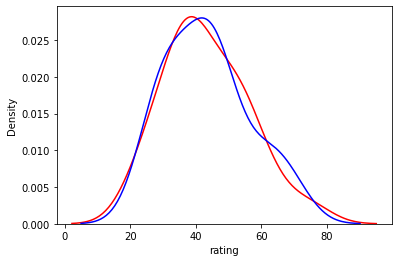

In [ ]:
ax1=sb.distplot(Y_test,hist=False,color="r",label="Y_test")
sb.distplot(Y_Pred,hist=False,color="b",label="Y_Pred",ax=ax1)

**Testing Accuracy**

In [ ]:
print(rg.score(X_train,Y_train))

0.8546424047011791


In [ ]:
print(rg.score(X_test,Y_test))

0.7697964487638276


**Forward Feature Selection**

In [ ]:
import statsmodels.api as sm 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X= np.append(arr = np.ones((75,1)).astype(int), values=X, axis=1) 

In [ ]:
x_opt=X[:, [0,1,2,3,4]]  
regressor_OLS=sm.OLS(endog = Y, exog=x_opt).fit()  
regressor_OLS.summary() 

In [ ]:
rg.fit(X_test.iloc[:,[0,1,2,4]],Y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
rg.score(X_test.iloc[:,[0,1,2,4]],Y_test)

0.7527030484917812

In [ ]:
Ilo=[1,2,3,4]

In [ ]:
print(X)

In [ ]:
Y1=Y.values

In [ ]:
B=np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,Y1))

In [ ]:
y_mean=np.mean(Y1)

In [ ]:
K=[0]

In [ ]:
print(B)

[ 6.76474291e+01 -2.89935724e-01  4.97787519e+00 -3.99473414e+00
 -3.88759928e-02  1.57598431e+00]


In [ ]:
for p in range(1,4):
    SSR=[]
    for i in Ilo:
         K.append(i)
         yi=np.dot(X[:,K],B[K,])
         ssr=np.sum((y_mean-yi)**2)
         SSR.append(ssr)
         K.remove(i)
    print(SSR)
    mini=min(SSR)
    o=SSR.index(mini)
    print(o)
    K.append(Ilo[o])
    print(K)
    Ilo.remove(Ilo[o])
  


[4979.271772618121, 109633.88660400703, 34634.523865521194, 27685.085238750493]
0
[0, 1]
[8066.983932641248, 12649.567669077947, 14966.08984580119]
0
[0, 1, 2]
[7305.917726835388, 6336.175689132198]
1
[0, 1, 2, 4]


In [ ]:
print(K)

[0, 1, 2, 4]


**Corelation**

In [ ]:
for i in range(1,6):
  cor=np.corrcoef(X[:,i],Y1)
  print(cor[0,1])
  

-0.6943772894559791
0.4681907009172461
-0.39337641883274627
-0.38805033587810916
0.6035025610302239


**SVD Of Independent Variables**

In [ ]:
from scipy.linalg import svd

In [ ]:
U,s,VT=svd(X_train,full_matrices=False)

In [ ]:
print(U.shape,s.shape,VT.shape)

(52, 5) (5,) (5, 5)


In [ ]:
xtild=VT.T @ np.linalg.inv(np.diag(s)) @ U.T @ Y_train   #computing the B matric

In [ ]:
print(xtild)

[ 0.30766303  6.14771041 -7.65165818 -0.04427815  3.6229988 ]


In [ ]:
svdPred=np.dot(X_test,xtild)                        #prediction of model

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


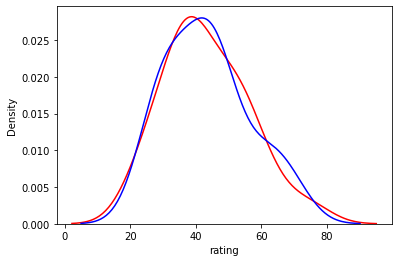

In [ ]:
ax1=sb.distplot(Y_test,hist=False,color="r",label="Y_test")
sb.distplot(Y_Pred,hist=False,color="b",label="svdPred",ax=ax1)